## About

This page showcases the work of [Benjamin Nowak](https://x.com/BjnNowak) who originally [made the chart with R](https://r-graph-gallery.com/web-waffle-chart-share.html). This post is a translation to Python by [Joseph Barbier](https://barbierjoseph.com).
Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![small multiple waffle chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-waffle-chart-for-time-series.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](/matplotlib) is used for creating the chart and add customization features
- [pandas](/pandas) for data loading and manipulation
- [highlight_text](/advanced-custom-annotations-matplotlib) for custom annotations
- [pywaffle](/waffle-chart) for creating the waffle chart
- `pyfonts` for loading the fonts

And that's it!


In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from pywaffle import Waffle
from highlight_text import fig_text, ax_text
from pyfonts import load_font, load_exact_font

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's](https://python-graph-gallery.com) Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [2]:
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv'
path = '../../static/data/storms.csv'
df = pd.read_csv(path)
df.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


## Basic waffle chart

In order to create the following chart, we:

- **Sum 2020 Values**: Calculate the total of storms for the year 2020 since it's the year with the most number of storms.

- **Prepare Subplots**: Create a subplot for each unique year in the DataFrame, setting the figure size and resolution (dpi).

- **Generate Waffle Charts**:

  - Iterate over each unique year.
  - Extract values for the current year.
  - Ensure the sum of values matches the total for 2020 by adding a balancing value.
  - Use `Waffle.make_waffle` to create the waffle chart for each year, with 100 rows and 10 columns, displayed vertically.


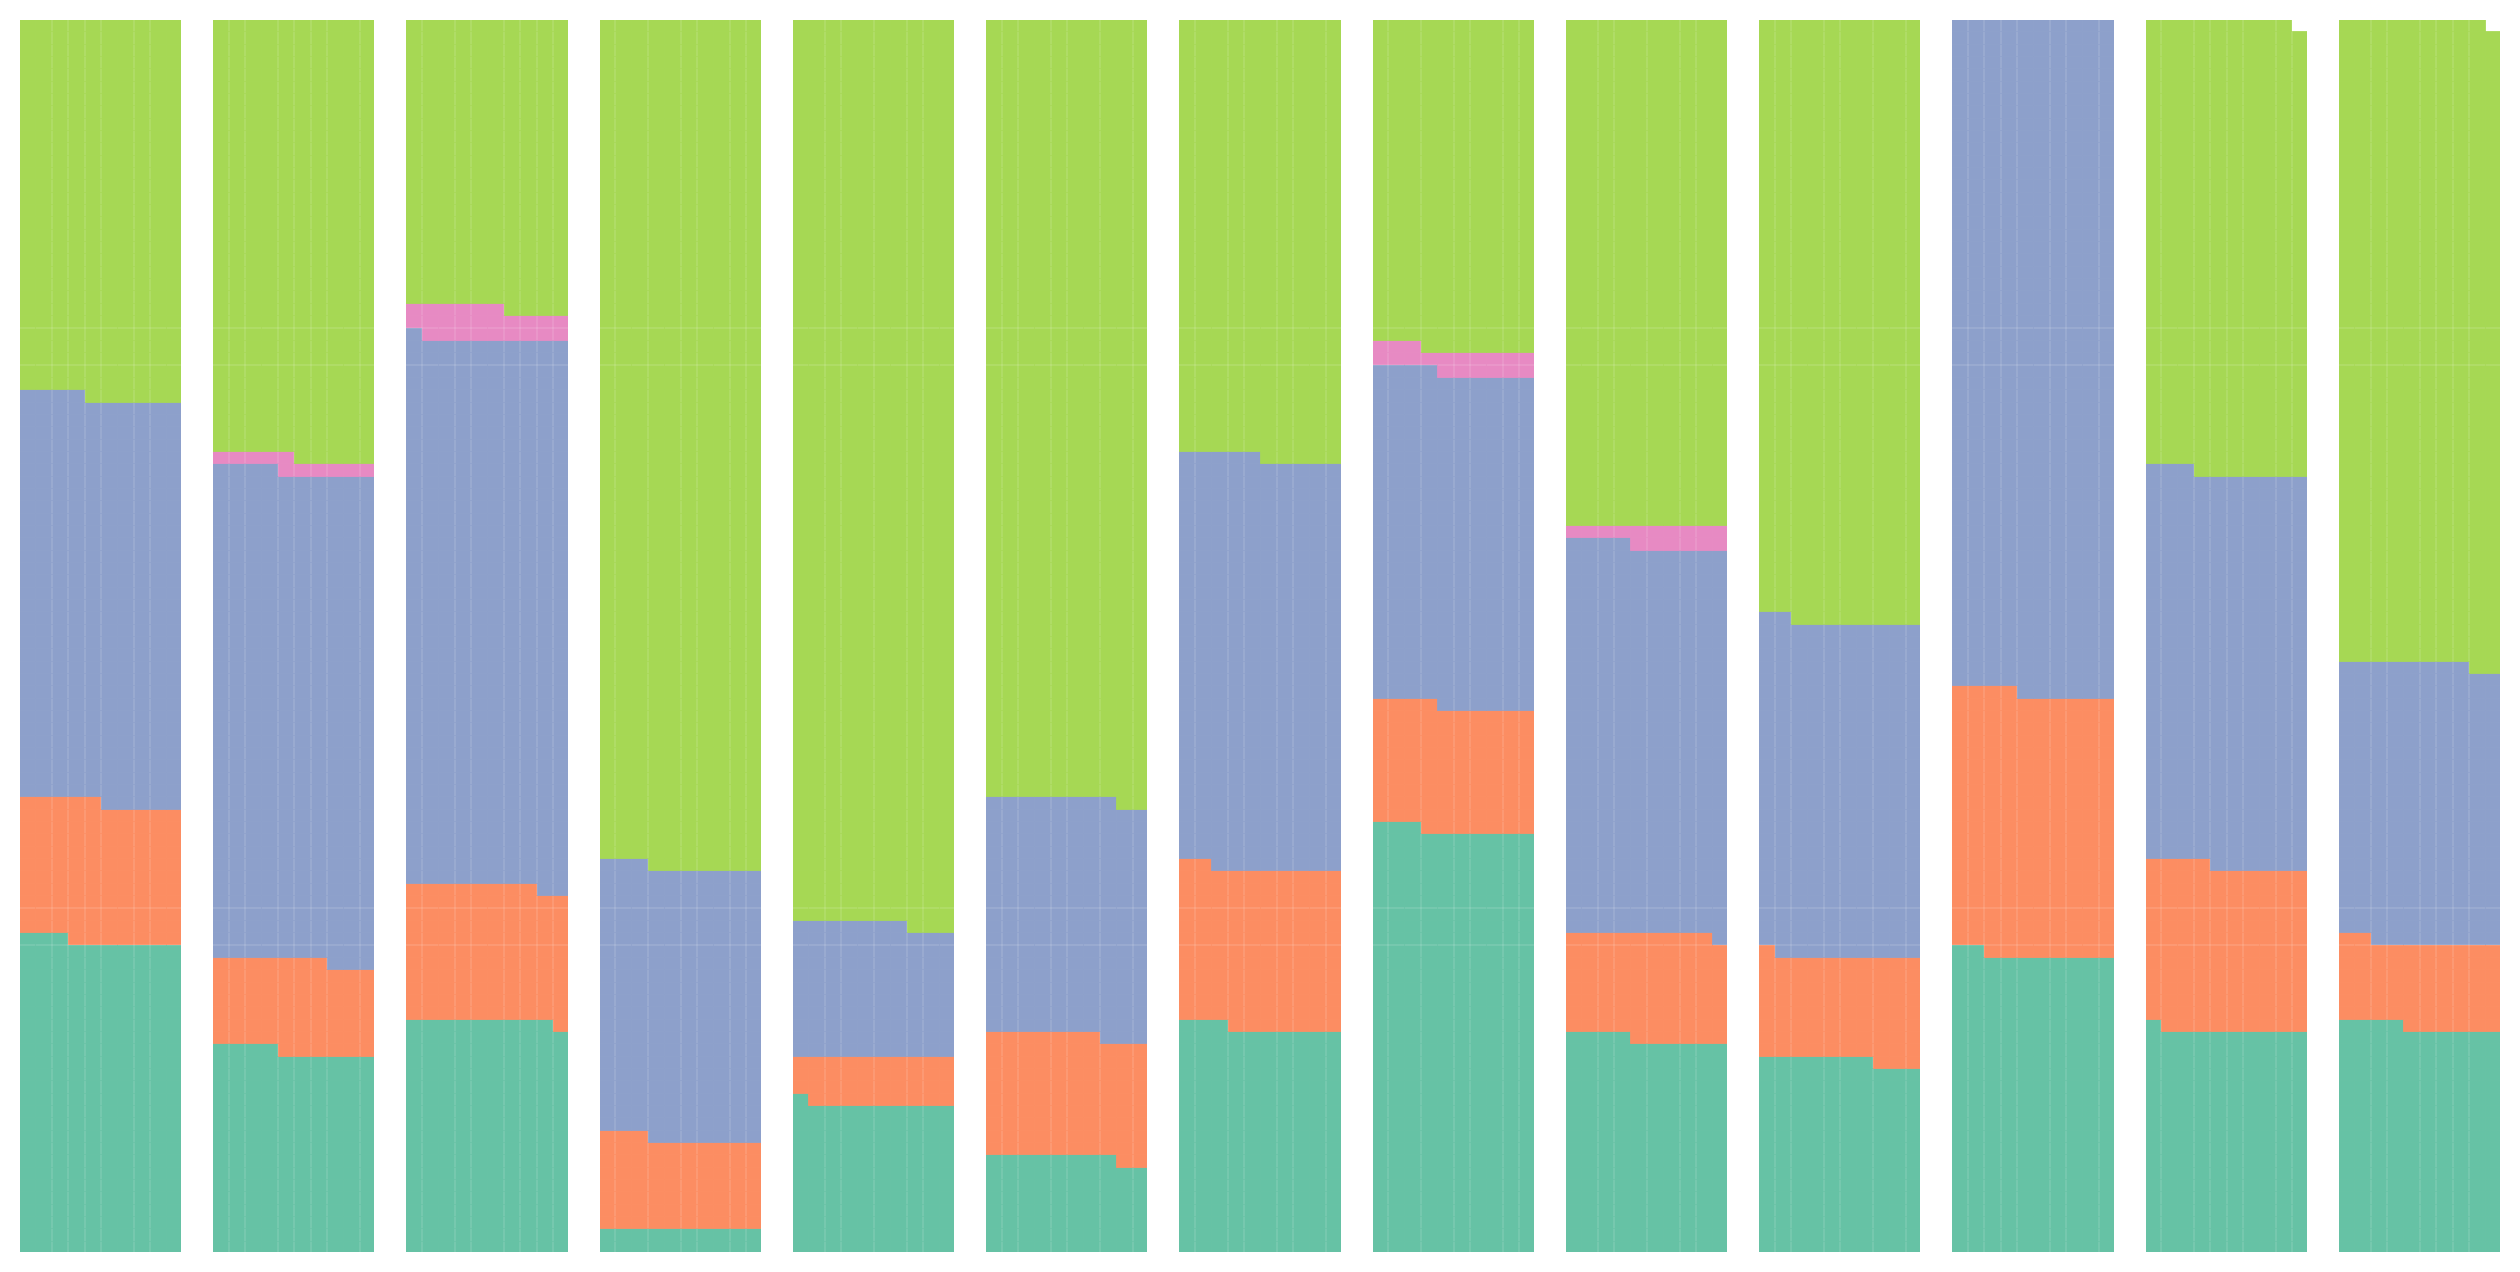

In [4]:
max_year_value = df[df['year']==2020]['n'].sum()

ncols = df['year'].nunique()
fig, axs = plt.subplots(ncols=ncols, figsize=(16,8), dpi=200)

for year, ax in zip(df['year'].unique(), axs):

    values = list(df[df['year']==year]['n'].values)
    values.append(max_year_value - sum(values))

    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
    )

plt.show()

## Custom colors

The colours are changed using the `colors` argument to `Waffle.make_waffle()`. We specify that the last colour is 'white' so that it is **confused with the background**.


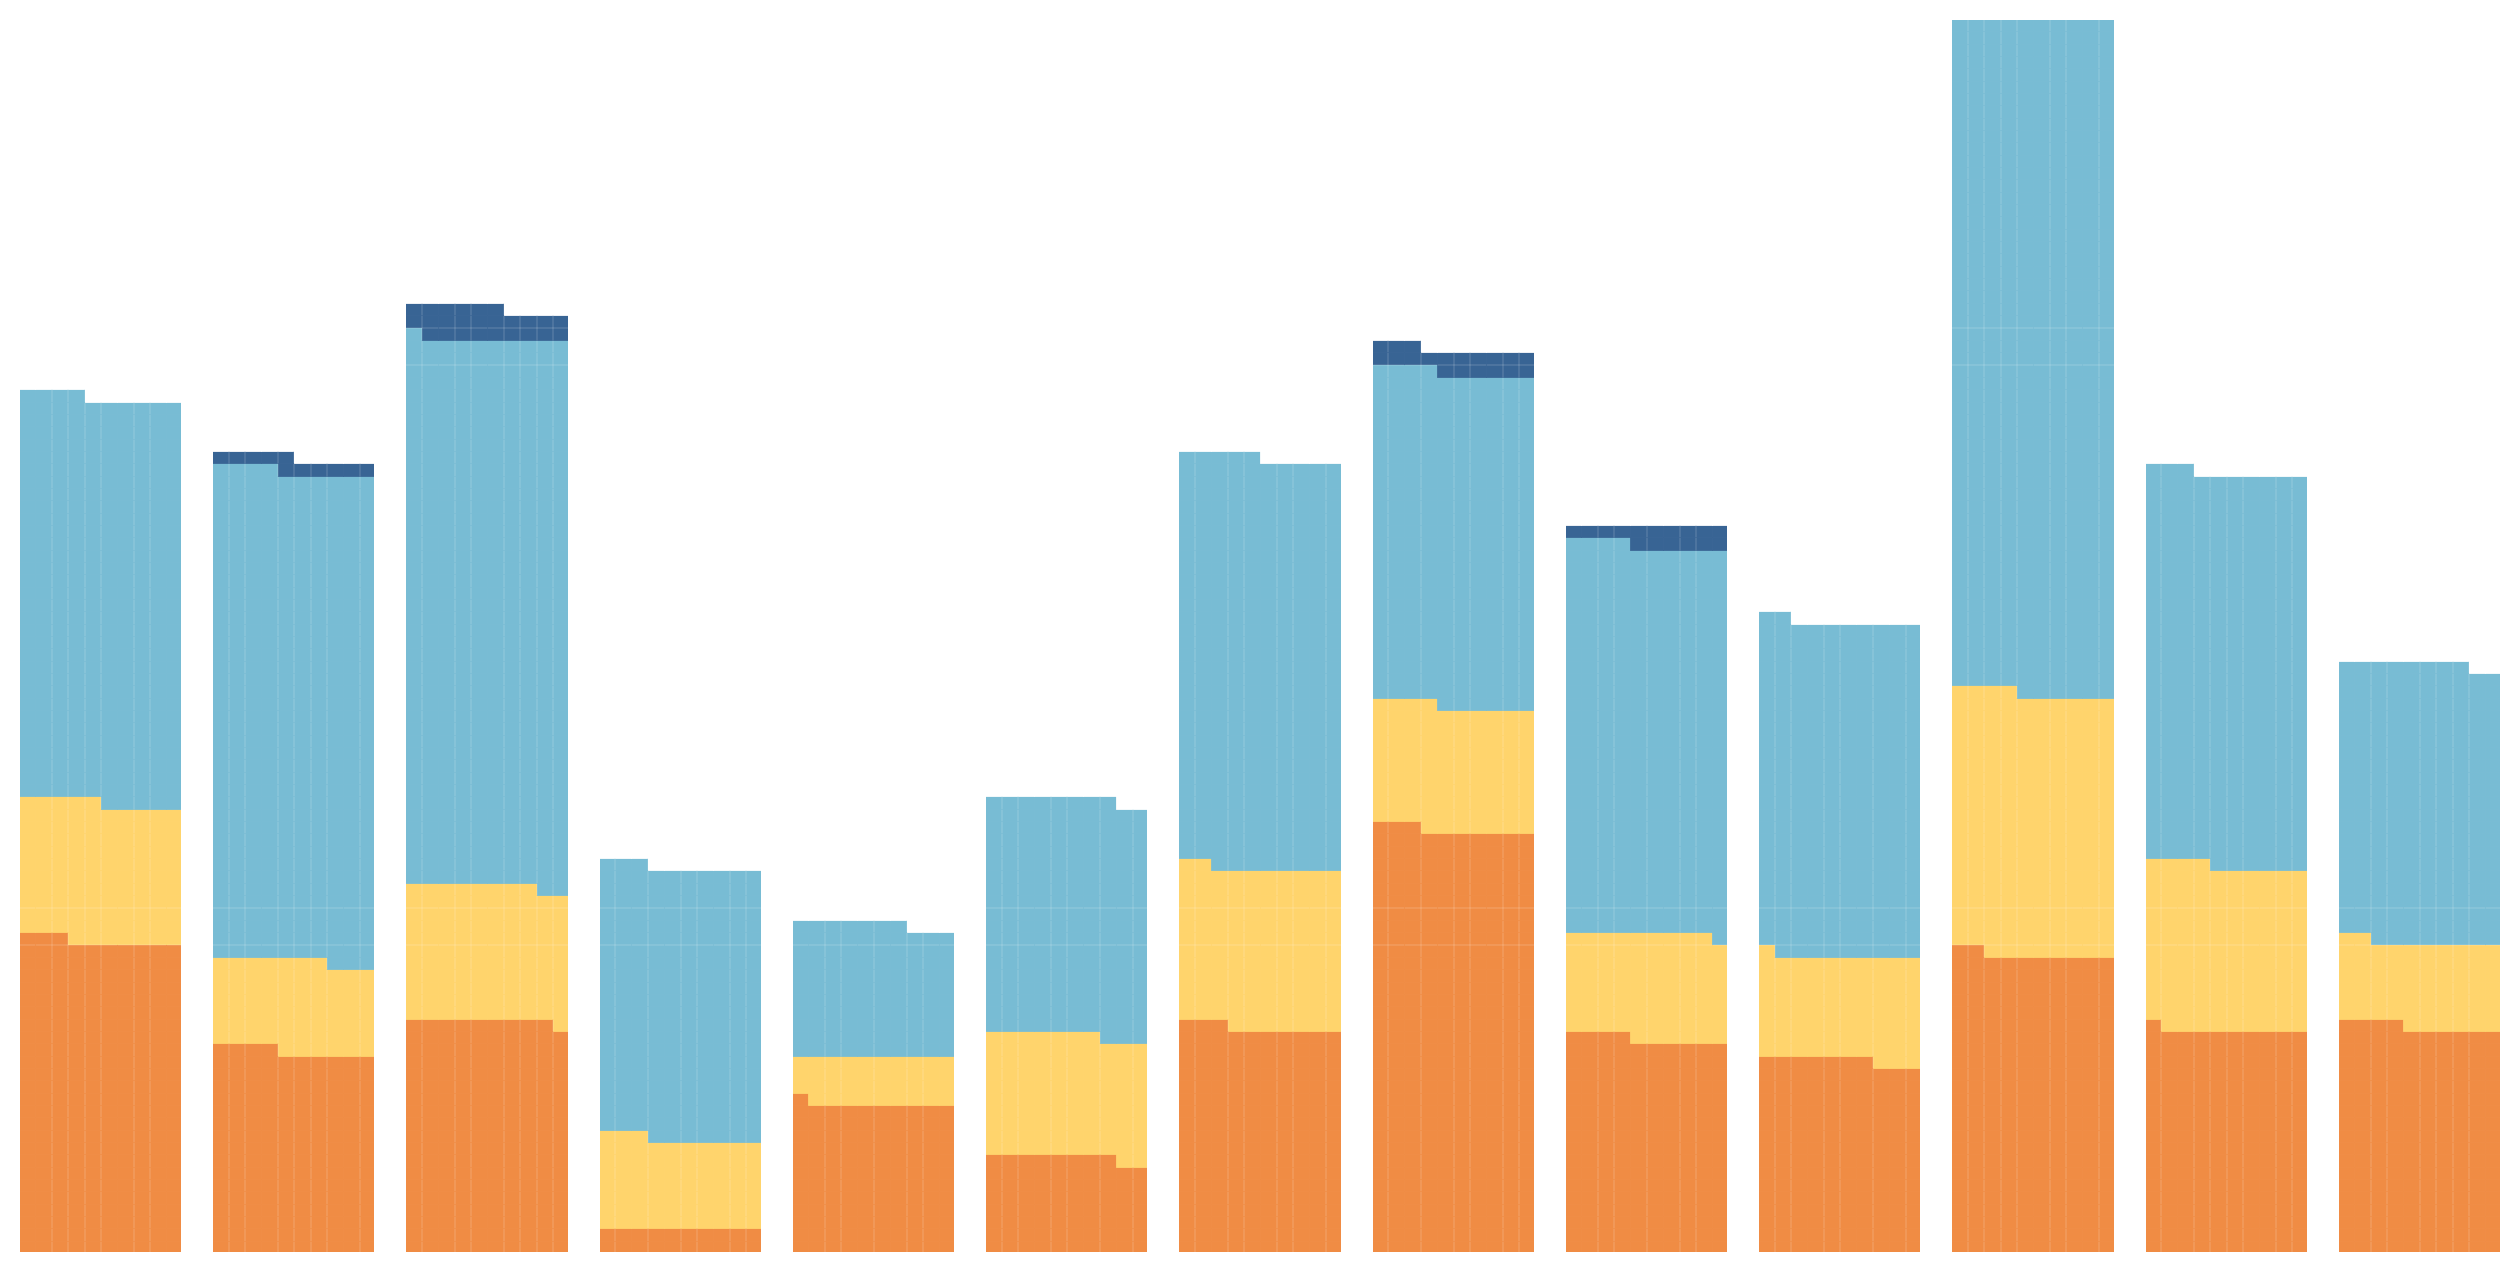

In [5]:
max_year_value = df[df['year']==2020]['n'].sum()

ncols = df['year'].nunique()
fig, axs = plt.subplots(ncols=ncols, figsize=(16,8), dpi=200)

for year, ax in zip(df['year'].unique(), axs):

    values = list(df[df['year']==year]['n'].values)
    values.append(max_year_value - sum(values))

    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
        colors=["#f08c44", "#ffd46c", "#78bcd4", "#386494", 'white']
    )

plt.show()

## Title and credit

In order to add annotation, we need 2 new tools:

- `pyfonts` to load the fonts
- `highlight_text` to custom the text style

`highlight_text` provides the `fig_text()` and `ax_text()` functions (you can learn in [this post](/advanced-custom-annotations-matplotlib) that extensively describes how they work.)


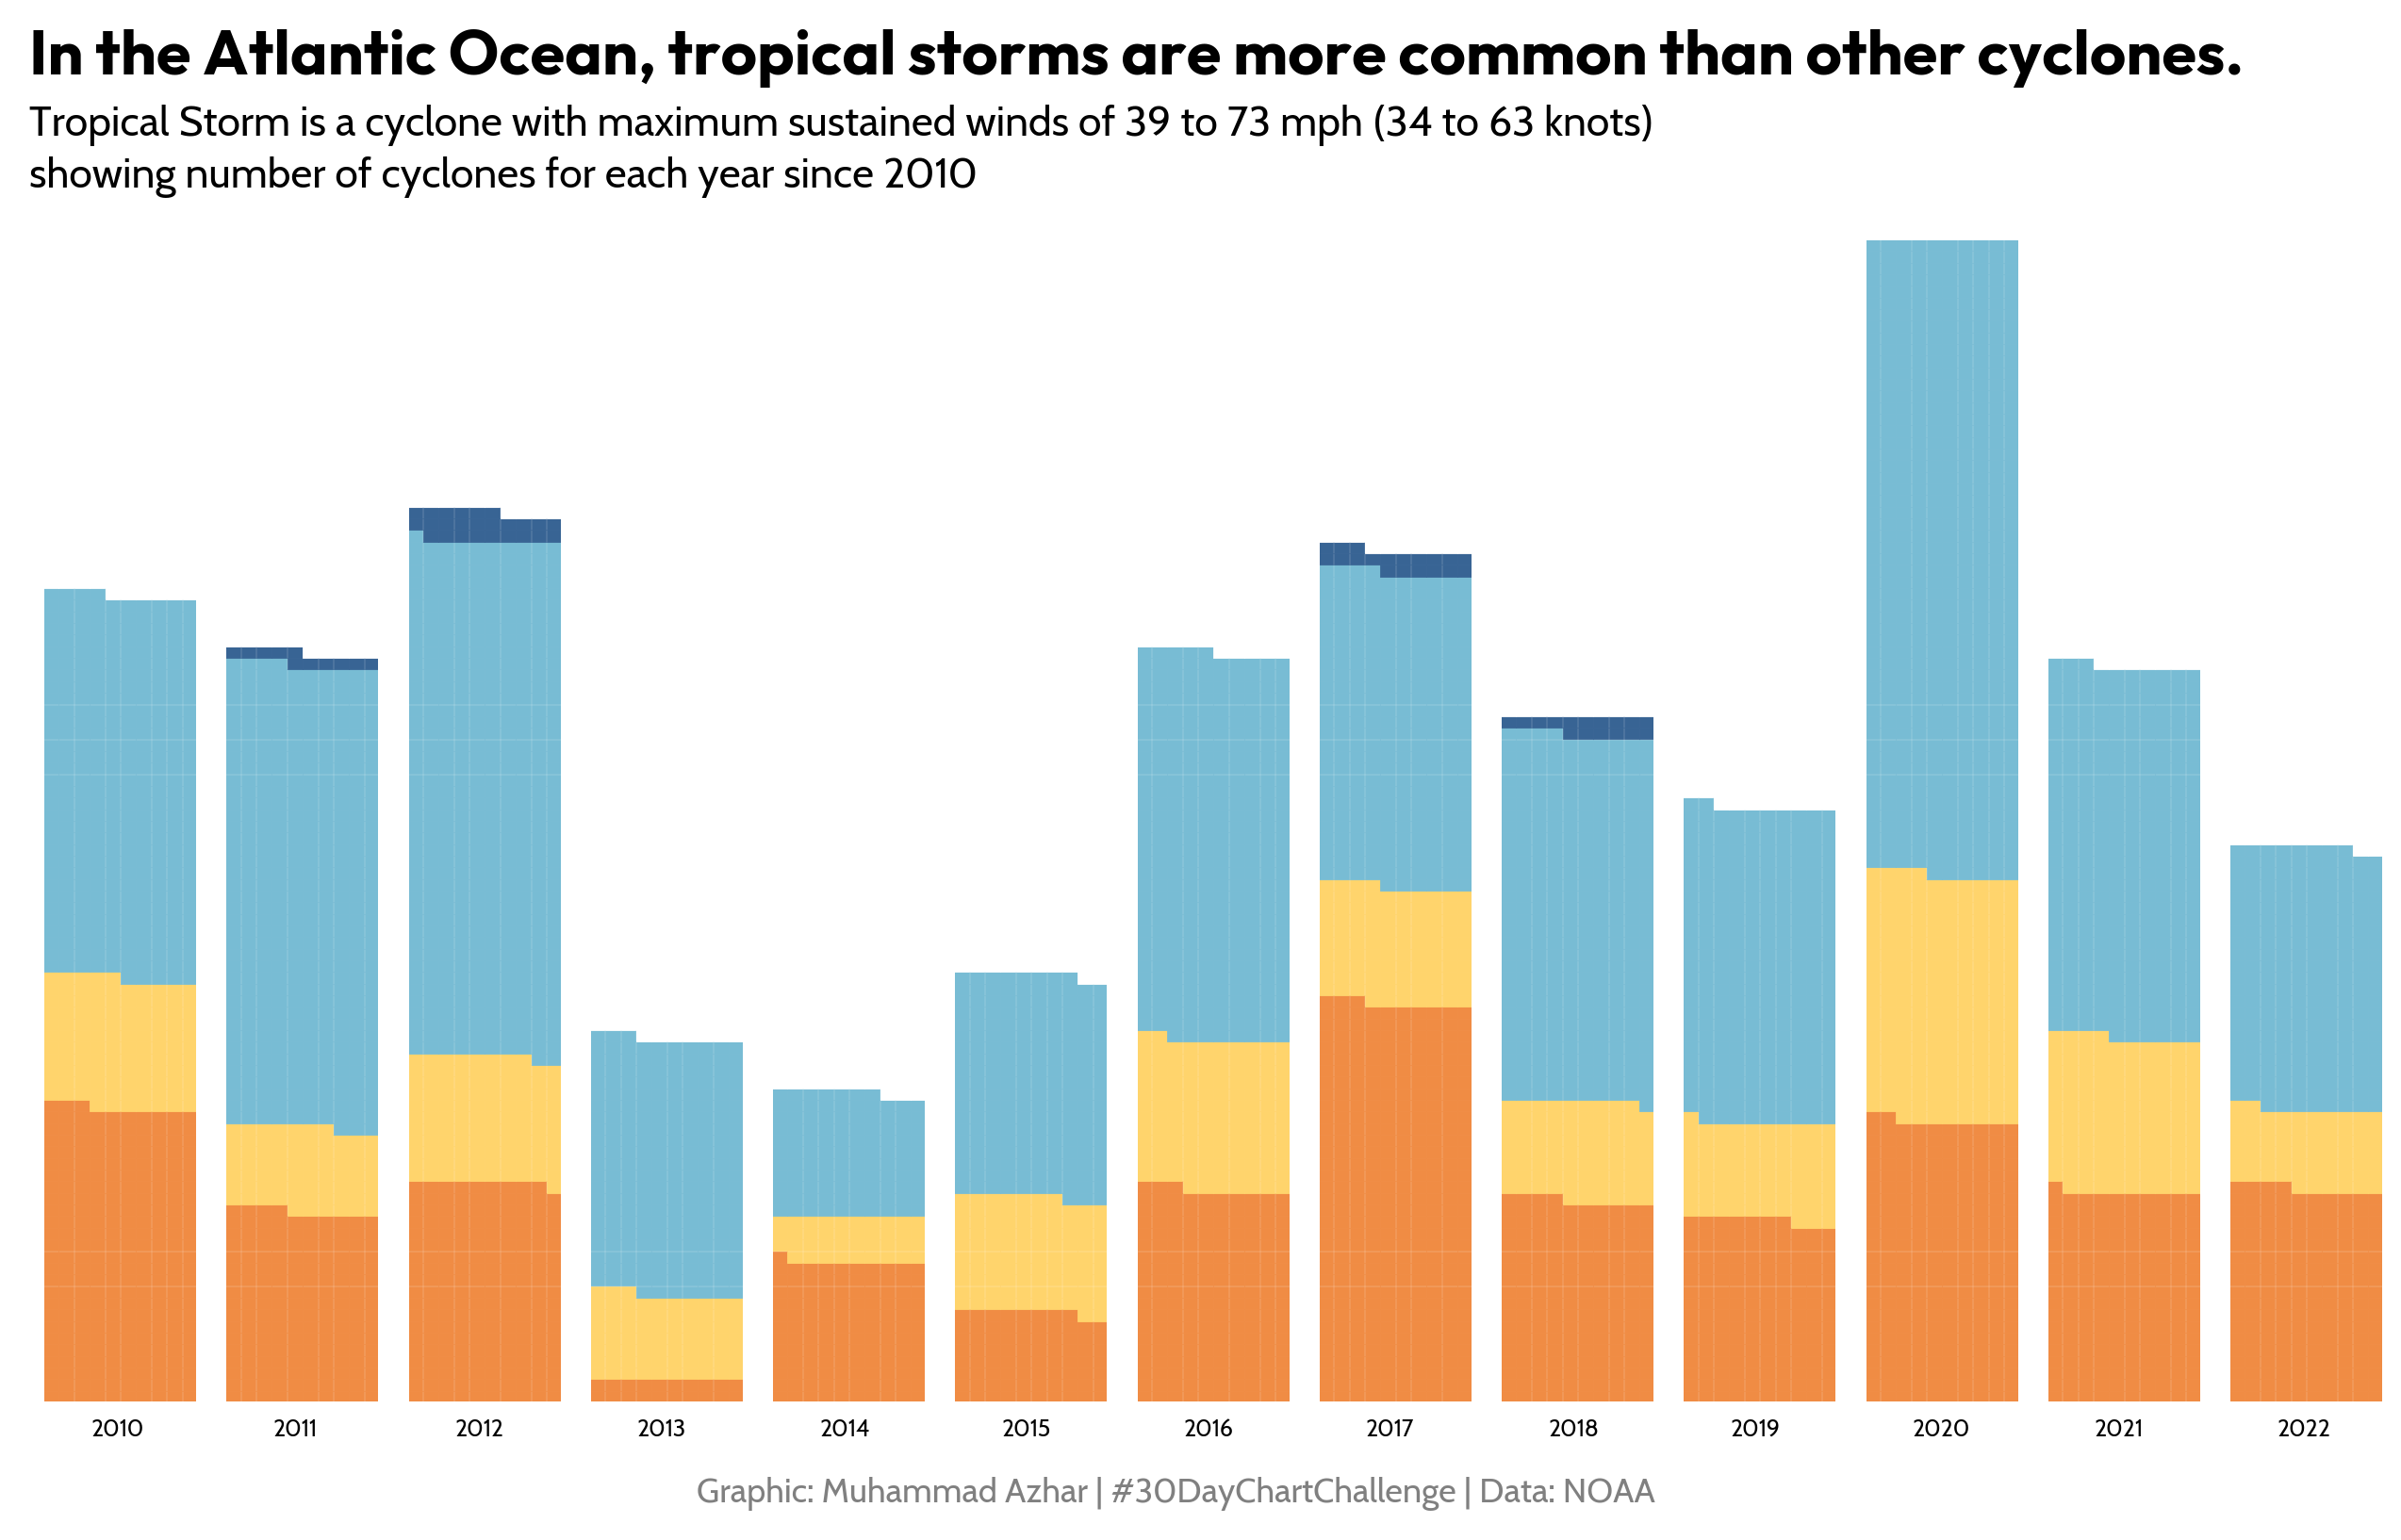

In [6]:
outfit_font = load_exact_font(
   font_url="https://github.com/Outfitio/Outfit-Fonts/raw/main/fonts/ttf/Outfit-Bold.ttf"
)
cabin_font = load_exact_font(
   font_url="https://github.com/google/fonts/raw/main/ofl/cabin/Cabin[wdth,wght].ttf"
)

max_year_value = df[df['year']==2020]['n'].sum()

ncols = df['year'].nunique()
fig, axs = plt.subplots(ncols=ncols, figsize=(16,8), dpi=200)

for year, ax in zip(df['year'].unique(), axs):

    values = list(df[df['year']==year]['n'].values)
    values.append(max_year_value - sum(values))

    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
        colors=["#f08c44", "#ffd46c", "#78bcd4", "#386494", 'white']
    )

    ax.text(
        x=0.03, y=-0.03, s=str(year), font=cabin_font, fontsize=9, zorder=3
    )

title_text = "In the Atlantic Ocean, tropical storms are more common than other cyclones."
subtitle_text = "Tropical Storm is a cyclone with maximum sustained winds of 39 to 73 mph (34 to 63 knots)\nshowing number of cyclones for each year since 2010"
caption_text = "Graphic: Muhammad Azhar | #30DayChartChallenge | Data: NOAA"

fig_text(
    x=0.12, y=1.02, s=title_text, ha='left', va='top',
    fontsize=24, font=outfit_font
)
fig_text(
    x=0.12, y=0.97, s=subtitle_text, ha='left', va='top',
    fontsize=16, font=cabin_font
)
fig_text(
    x=0.5, y=0.06, s=caption_text, ha='center', color='grey',
    fontsize=13, font=cabin_font
)

plt.show()

## Legend

The legend is entirely manually defined, which implies some workaround. In practice, we:

- **Categories and Colors**:

  - Extract unique categories from the 'status' column.
  - Define colors for each category.

- **Rectangle Dimensions and Positioning**:

  - Set dimensions and initial positions for rectangles.

- **Create Legend**:
  - Iterate over categories and colors.
  - For each category, create a colored rectangle and place it on the figure.
  - Add the category name next to the corresponding rectangle.


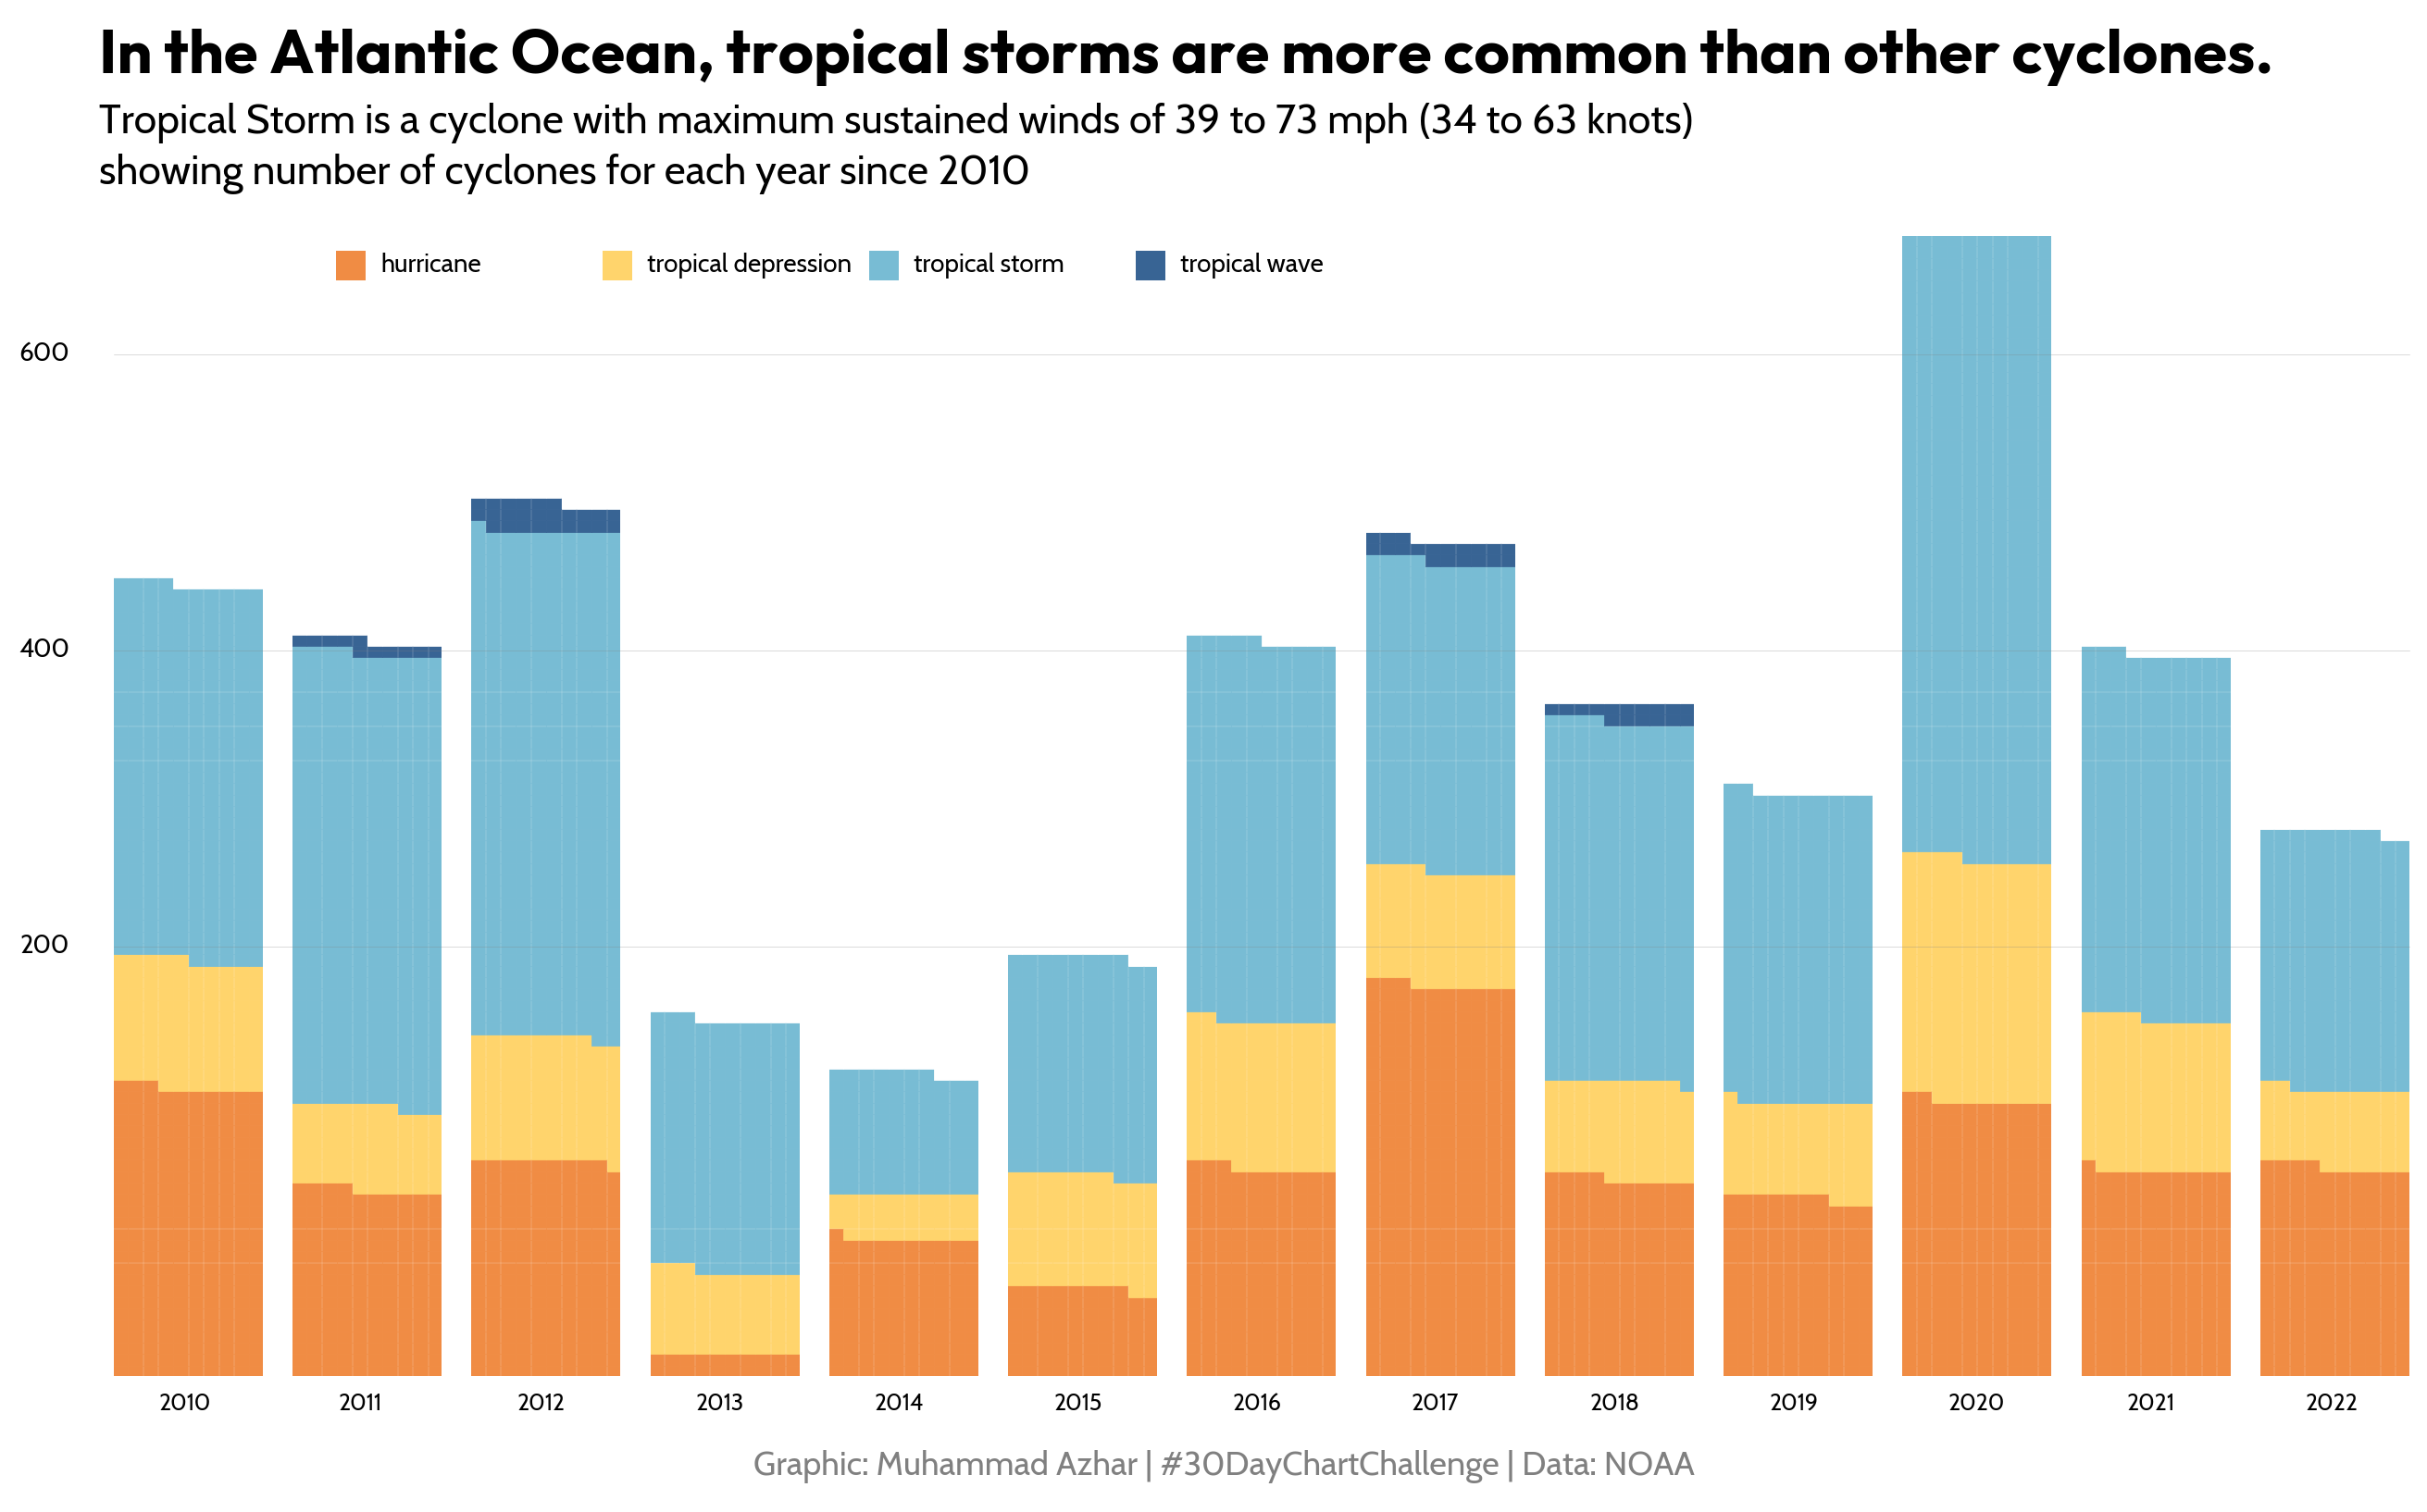

In [8]:
outfit_font = load_exact_font(
   font_url="https://github.com/Outfitio/Outfit-Fonts/raw/main/fonts/ttf/Outfit-Bold.ttf"
)
cabin_font = load_exact_font(
   font_url="https://github.com/google/fonts/raw/main/ofl/cabin/Cabin[wdth,wght].ttf"
)

max_year_value = df[df['year']==2020]['n'].sum()

ncols = df['year'].nunique()
fig, axs = plt.subplots(ncols=ncols, figsize=(16,8), dpi=200)

for year, ax in zip(df['year'].unique(), axs):

    values = list(df[df['year']==year]['n'].values)
    values.append(max_year_value - sum(values))

    Waffle.make_waffle(
        ax=ax,
        rows=100, 
        columns=10, 
        values=values,
        vertical=True,
        colors=["#f08c44", "#ffd46c", "#78bcd4", "#386494", 'white']
    )

    ax.text(
        x=0.03, y=-0.03, s=str(year), font=cabin_font, fontsize=9, zorder=3
    )

title_text = "In the Atlantic Ocean, tropical storms are more common than other cyclones."
subtitle_text = "Tropical Storm is a cyclone with maximum sustained winds of 39 to 73 mph (34 to 63 knots)\nshowing number of cyclones for each year since 2010"
caption_text = "Graphic: Muhammad Azhar | #30DayChartChallenge | Data: NOAA"

fig_text(
    x=0.12, y=1.02, s=title_text, ha='left', va='top',
    fontsize=24, font=outfit_font
)
fig_text(
    x=0.12, y=0.97, s=subtitle_text, ha='left', va='top',
    fontsize=16, font=cabin_font
)
fig_text(
    x=0.5, y=0.06, s=caption_text, ha='center', color='grey',
    fontsize=13, font=cabin_font
)

total_blocks = 100 * 10  # 100 rows, 10 columns
line_block_positions = [200, 400, 600]
line_positions = [1 - (pos / total_blocks) for pos in line_block_positions]
for y, block_pos in zip(line_positions, line_block_positions[::-1]):
    line = plt.Line2D([0.125, 0.9], [y, y], transform=fig.transFigure, color='grey', linestyle='-', linewidth=0.2, alpha=0.5)
    fig.add_artist(line)
    fig.text(0.11, y, str(block_pos), va='center', ha='right', transform=fig.transFigure, fontsize=10, font=cabin_font)

# Add rectangles and labels
categories = list(df['status'].unique())
colors = ["#f08c44", "#ffd46c", "#78bcd4", "#386494"]
rect_height = 0.02
rect_width = 0.01
spacing = 0.08
start_x = 0.2
start_y = 0.85
for i, (category, color) in enumerate(zip(categories, colors)):
    rect = plt.Rectangle((start_x + i * (rect_width + spacing), start_y), rect_width, rect_height, 
                         facecolor=color, edgecolor='none', transform=fig.transFigure)
    fig.add_artist(rect)
    fig.text(start_x + i * (rect_width + spacing) + rect_width + 0.005, start_y + rect_height / 2, 
             category, va='center', ha='left', transform=fig.transFigure, fontsize=10, font=cabin_font)

plt.savefig('../../static/graph/web-waffle-chart-for-time-series.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce a [waffle chart](/waffle-chart) with custom colors and fonts.

You might be interested by:

- the [waffle chart section](/waffle-chart)
- how to [customize block style](/558-waffle-bar-chart)
- how to use waffle charts [to describe London boroughs](/web-waffle-with-small-multiples)
